<a href="https://colab.research.google.com/github/abhishek-AI2001/Customer-Segmentation-using-RFM-Analysis/blob/main/Notebook/Customer_Segmentation_using_RFM_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')

In [ ]:
df_transa = pd.read_csv('/content/Transactions_Cleaned.csv')
df_cust = pd.read_csv('/content/CustomerDemographic_Cleaned.csv')

In [ ]:
df_transa.head(3)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1544.61


In [ ]:
df_cust.head(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,67
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,40
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,67


In [ ]:
print("Total records in the Transaction Dataset : {}".format(df_transa.shape))
print("==========")
print("Total records in the customer Dataset : {}".format(df_cust.shape))

Total records in the Transaction Dataset : (19803, 14)
Total records in the customer Dataset : (3912, 13)


In [ ]:
# Merging both the Transaction Dataset and Customer Demographics Dataset based on customer_id.

merged_trans_cust = pd.merge(df_transa, df_cust,
                             left_on='customer_id',
                             right_on='customer_id',
                             how='inner')

In [ ]:
merged_trans_cust.head(3)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10.0,66
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10.0,42
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,Male,9,1977-06-03,Desktop Support Technician,Retail,Affluent Customer,N,No,22.0,43


In [ ]:
print("Total records in the Merged Dataset : {}".format(merged_trans_cust.shape))

Total records in the Merged Dataset : (19354, 26)


In [ ]:
merged_trans_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19354 entries, 0 to 19353
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       19354 non-null  int64  
 1   product_id                           19354 non-null  int64  
 2   customer_id                          19354 non-null  int64  
 3   transaction_date                     19354 non-null  object 
 4   online_order                         19354 non-null  float64
 5   order_status                         19354 non-null  object 
 6   brand                                19354 non-null  object 
 7   product_line                         19354 non-null  object 
 8   product_class                        19354 non-null  object 
 9   product_size                         19354 non-null  object 
 10  list_price                           19354 non-null  float64
 11  standard_cost               

In [ ]:
merged_trans_cust['transaction_date']= pd.to_datetime(merged_trans_cust['transaction_date'])

In [ ]:
merged_trans_cust['transaction_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 19354 entries, 0 to 19353
Series name: transaction_date
Non-Null Count  Dtype         
--------------  -----         
19354 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 151.3 KB


# RFM Analysis (Recency, Frequency, Monetary)

RFM analysis is a behavior-based customer segmentation technique used to understand and group customers based on their purchasing behavior. It is widely used in marketing, CRM, and data analytics to target customers more effectively and design personalized campaigns.

RFM examines three key aspects of customer behavior:

**Recency (R)** – How recently did a customer purchase?

- Measures the number of days since a customer’s last purchase.

- Customers who purchased recently are more    likely to engage again.

- Low recency (small number of days) → more recent purchase → higher engagement probability.

**Frequency (F)** – How often does a customer purchase?

- Counts the total number of purchases made by a customer.

- Customers who purchase frequently show loyalty and consistent interest in the products.

- High frequency → higher value as a returning customer.

**Monetary Value (M)** – How much does a customer spend?

- Measures the total money a customer has spent.

- Customers with high monetary value are your top spenders.

**Why RFM Analysis is Useful**

Customer Segmentation: Groups customers based on purchasing behavior. For example:

Big Spenders: High monetary value but may not purchase often or recently.

Loyal Customers: Frequent purchases with moderate spending.

At-Risk Customers: Used to identify customers who haven’t purchased in a while.

Targeted Marketing & Promotions: Helps managers design personalized campaigns for each segment, increasing ROI.

Resource Optimization: Focus efforts on high-value or high-potential customers.

Customer Retention: Identifies disengaged or low-frequency customers to re-engage with special offers.

Example Consideration

A customer may spend a lot (high M), but:

If they purchased only once → not loyal yet.

If they purchased long ago → may be inactive.

RFM helps combine these metrics to identify truly valuable customers, not just big spenders.

In [ ]:
# Maximum Transaction Date or the latest transaction date.

max_trans_date = max(merged_trans_cust['transaction_date']).date()
max_trans_date

datetime.date(2017, 12, 30)

In [ ]:
# Taking the last transaction date as a reference date for comparision and
# finding the number of days between a transaction date and last transaction date to compute the recency.

comparison_date = datetime.strptime(str(max_trans_date), "%Y-%m-%d")
comparison_date

datetime.datetime(2017, 12, 30, 0, 0)

In [ ]:
# Creating a RFM table that will contain all the values for recency , frequency and Monetray data.

rfm_table = merged_trans_cust.groupby(['customer_id']).agg({'transaction_date': lambda date : (comparison_date - date.max()).days,
                                                            'product_id' : lambda prod_id : len(prod_id),
                                                            'Profit' : lambda p : sum(p)})

In [ ]:
rfm_table

,transaction_date,product_id,Profit
customer_id,,,
1,7,11,3018.09
2,128,3,2226.26
3,102,8,3362.81
4,195,2,220.57
5,16,6,2394.94
...,...,...,...
3496,256,4,2045.84
3497,52,3,1648.32
3498,127,6,3147.33


In [ ]:
# The columns in rfm_table dataframe are not properly named. Renaming of the columns to appropiate name is needed

rfm_table.columns

Index(['transaction_date', 'product_id', 'Profit'], dtype='object')

In [ ]:
# Renaming column names to appropiate names

rfm_table.rename(columns={'transaction_date' : 'recency',
                        'product_id' : 'frequency',
                        'Profit' : 'monetary'} , inplace=True)

In [ ]:
# Dividing the recency, frequency and monetary into 4 quartiles (25%, 50%, 75% and max).
# These values will help us to calculate RFM score for a customer and classify based on their RFM score.

rfm_table['r_quartile'] = pd.qcut(rfm_table['recency'], 4, ['4','3','2','1'])
rfm_table['f_quartile'] = pd.qcut(rfm_table['frequency'], 4, ['1','2','3','4'])
rfm_table['m_quartile'] = pd.qcut(rfm_table['monetary'], 4, ['1','2','3','4'])

In [ ]:
rfm_table

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
customer_id,,,,,,
1,7,11,3018.09,4,4,3
2,128,3,2226.26,1,1,2
3,102,8,3362.81,1,4,3
4,195,2,220.57,1,1,1
5,16,6,2394.94,4,2,2
...,...,...,...,...,...,...
3496,256,4,2045.84,1,1,2
3497,52,3,1648.32,2,1,1
3498,127,6,3147.33,1,2,3


In [ ]:
# Caluclation of RFM Score.
# Max weightage is given to recency then frequency and then  monetary.

rfm_table['rfm_score'] = 100*rfm_table['r_quartile'].astype(int)+10*rfm_table['f_quartile'].astype(int)+rfm_table['m_quartile'].astype(int)

In [ ]:
rfm_table.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score
customer_id,,,,,,,
1,7,11,3018.09,4,4,3,443
2,128,3,2226.26,1,1,2,112
3,102,8,3362.81,1,4,3,143
4,195,2,220.57,1,1,1,111
5,16,6,2394.94,4,2,2,422


In [ ]:
# Assigning a title to a cuustomer.
# Platinum corresponds to highest range of RFM score down to Bronze to lowest range of RFM score.

rfm_table['customer_title'] = pd.qcut(rfm_table['rfm_score'], 4, ['Bronze','Silver','Gold','Platinum'])

In [ ]:
rfm_table.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title
customer_id,,,,,,,,
1,7,11,3018.09,4,4,3,443,Platinum
2,128,3,2226.26,1,1,2,112,Bronze
3,102,8,3362.81,1,4,3,143,Bronze
4,195,2,220.57,1,1,1,111,Bronze
5,16,6,2394.94,4,2,2,422,Platinum


# Merging both RFM Table with Transaction and Customer Tables

The RFM table is merged with the Transactions and Customer Demographics datasets to gain deeper insights into customer segments along with their transaction behavior. The dataframes are joined using the customer_id field from both datasets.

In [ ]:
cust_trans_rfm = pd.merge(merged_trans_cust,
                          rfm_table, left_on='customer_id',
                          right_on='customer_id', how='inner')

In [ ]:
cust_trans_rfm.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,tenure,Age,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,10.0,66,75,3,645.99,2,1,1,211,Bronze
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,10.0,42,20,7,4179.11,3,3,4,334,Gold
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,22.0,43,56,6,4965.43,2,2,4,224,Silver
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,16.0,59,121,7,3983.97,1,3,3,133,Bronze
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,2.0,24,75,10,6646.00,2,4,4,244,Silver


In [ ]:
cust_trans_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19354 entries, 0 to 19353
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19354 non-null  int64         
 1   product_id                           19354 non-null  int64         
 2   customer_id                          19354 non-null  int64         
 3   transaction_date                     19354 non-null  datetime64[ns]
 4   online_order                         19354 non-null  float64       
 5   order_status                         19354 non-null  object        
 6   brand                                19354 non-null  object        
 7   product_line                         19354 non-null  object        
 8   product_class                        19354 non-null  object        
 9   product_size                         19354 non-null  object        
 10  list_price

# Creating an Age Group Feature

In [ ]:
cust_trans_rfm['Age_Group'] = cust_trans_rfm['Age'].apply(lambda x : (math.floor(x/10)+1)*10)

# Creating a Detail Customer title / tag based on RFM Score :

An extended version of customer title is made which divides the entire number of customers into 11 groups. The groups are mainly Platinum Customers, Very Loyal, Becoming Loyal, Recent Customers, Potential Customers, Late Bloomer, Loosing Customers, High Risk Customers, Almost Lost Customers, Evasive Customers and Lost Customers.
The demarkation of customers into the above mentioned groups is based on their RFM scores.

In [ ]:
# Function as a lookup to appropiate customer titles based on RFM score.

def cust_score_title_lkup(cols):

    rfm_score = cols[0]

    if rfm_score >= 444:
        return 'Platinum Customer'
    elif rfm_score >=433 and rfm_score < 444:
        return 'Very Loyal'
    elif rfm_score >=421 and rfm_score < 433:
        return 'Becoming Loyal'
    elif rfm_score >=344 and rfm_score < 421:
        return 'Recent Customer'
    elif rfm_score >=323 and rfm_score < 344:
        return 'Potential Customer'
    elif rfm_score >=311 and rfm_score < 323:
        return 'Late Bloomer'
    elif rfm_score >=224 and rfm_score < 311:
        return 'Loosing Customer'
    elif rfm_score >=212 and rfm_score < 224:
        return 'High Risk Customer'
    elif rfm_score >=124 and rfm_score < 212:
        return 'Almost Lost Customer'
    elif rfm_score >=112 and rfm_score < 124:
        return 'Evasive Customer'
    else :
        return 'Lost Customer'

In [ ]:
# Applying the above functions and creating a new feature detail_cust_title

cust_trans_rfm['detail_cust_title']=cust_trans_rfm[['rfm_score']].apply(cust_score_title_lkup, axis=1)

/tmp/ipython-input-1375572388.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rfm_score = cols[0]


In [ ]:
# Function to provide ranks to the customers based on their title.

def get_rank(cols):

    title = cols[0]

    if title=='Platinum Customer':
        return 1
    elif title=='Very Loyal':
        return 2
    elif title == 'Becoming Loyal':
        return 3
    elif title == 'Recent Customer':
        return 4
    elif title=='Potential Customer':
        return 5
    elif title == 'Late Bloomer':
        return 6
    elif title == 'Loosing Customer':
        return 7
    elif title=='High Risk Customer':
        return 8
    elif title == 'Almost Lost Customer':
        return 9
    elif title == 'Evasive Customer':
        return 10
    else :
        return 11

In [ ]:
# Applying the above functions and creating a new feature rank

cust_trans_rfm['rank']=cust_trans_rfm[['detail_cust_title']].apply(get_rank, axis=1)

/tmp/ipython-input-782112168.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  title = cols[0]


In [ ]:
cust_trans_rfm.head(10)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title,Age_Group,detail_cust_title,rank
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,3,645.99,2,1,1,211,Bronze,70,Almost Lost Customer,9
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,7,4179.11,3,3,4,334,Gold,50,Potential Customer,5
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,6,4965.43,2,2,4,224,Silver,50,Loosing Customer,7
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,7,3983.97,1,3,3,133,Bronze,60,Almost Lost Customer,9
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,10,6646.00,2,4,4,244,Silver,30,Loosing Customer,7
5,6,25,2339,2017-03-08,1.0,Approved,Giant Bicycles,Road,medium,medium,...,9,4669.90,4,4,4,444,Platinum,70,Platinum Customer,1
6,7,22,1542,2017-04-21,1.0,Approved,WeareA2B,Standard,medium,medium,...,5,1825.32,1,2,1,121,Bronze,50,Evasive Customer,10
7,8,15,2459,2017-07-15,0.0,Approved,WeareA2B,Standard,medium,medium,...,11,4737.30,2,4,4,244,Silver,40,Loosing Customer,7
8,9,67,1305,2017-08-10,0.0,Approved,Solex,Standard,medium,large,...,5,2825.00,1,2,2,122,Bronze,60,Evasive Customer,10
9,10,12,3262,2017-08-30,1.0,Approved,WeareA2B,Standard,medium,medium,...,10,4290.81,4,4,4,444,Platinum,70,Platinum Customer,1


# 2. Exporting to CSV File

After performing data quality assessment(DQA), data cleaning and RFM Analysis on the dataset, it's time to export the dataset to a csv file for further exploratory data analysis (EDA) and this data will drive the Sales Customer Segmenation Dashboard developed in POWER BI.

In [ ]:
cust_trans_rfm.to_csv('Customer_Trans_RFM_Analysis.csv', index=False)

In [ ]:
print("Total records in final dataset : {}".format(cust_trans_rfm.shape))

Total records in final dataset : (19354, 37)


# 3. Data Analysis and Exploration

3.1. New Customer vs Old Customer Age Distributions

Most New / Old Customers are aged between 40-49. The lowest age groups are under 20 and 80+ for both Old and New Customers dataset.
Among the New Customers the most populated age bracket is 20-29 and 60-69, while the maximum Old Customers are from the age bracket 50-69.
There is a steep drop in number of customers in 30-39 age groupsd among the New Customers.

In [ ]:
# Loading the New Customers Dataset

new_cust = pd.read_csv('/content/NewCustomerList_Cleaned.csv')

In [ ]:
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age,Age Group
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,63,70
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,51,60
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,46,50
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,42,50
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,55,60


/tmp/ipython-input-2351115284.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_cust, x='Age Group', palette="viridis")


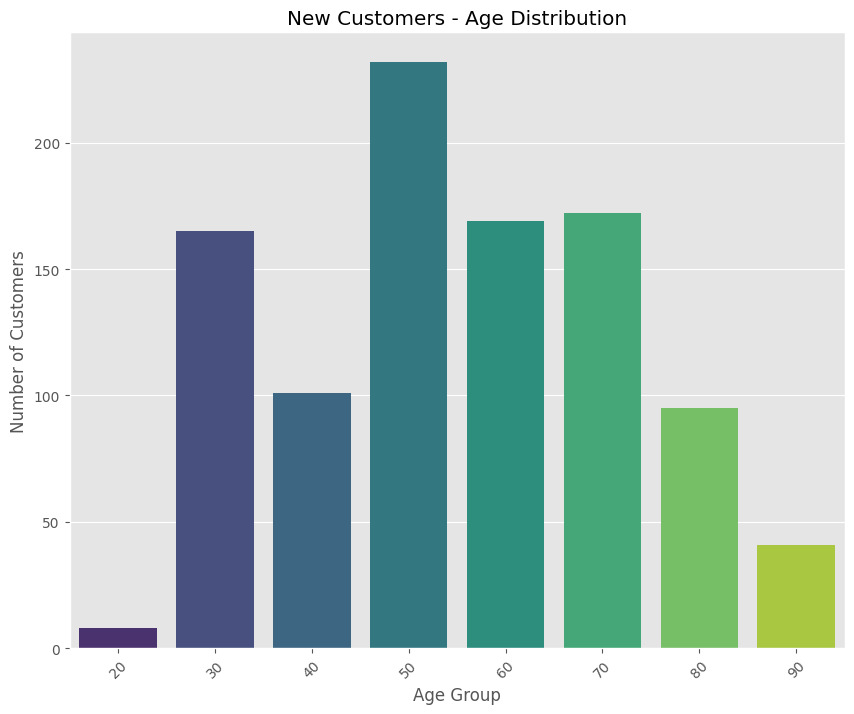

In [ ]:

plt.figure(figsize=(10,8))
sns.countplot(data=new_cust, x='Age Group', palette="viridis")

plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('New Customers - Age Distribution')
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()


/tmp/ipython-input-1961574630.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cust_trans_rfm, x='Age_Group', palette="mako")


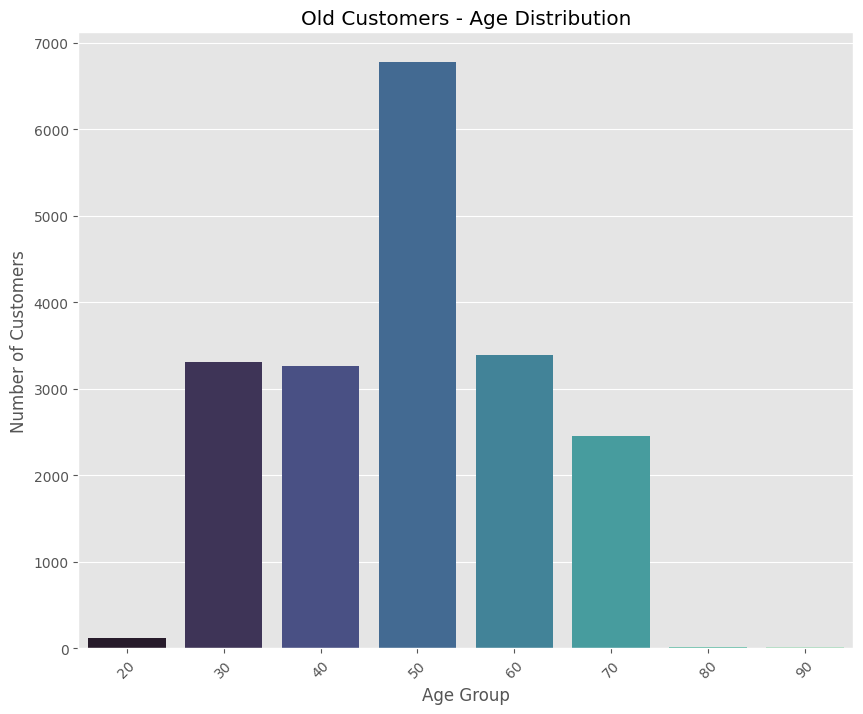

In [ ]:

plt.figure(figsize=(10,8))
sns.countplot(data=cust_trans_rfm, x='Age_Group', palette="mako")

plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Old Customers - Age Distribution')
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()


3.2. Bike related purchases over last 3 years by gender

Over the last 3 years approximately 51% of the buyers are women and 49% were male buyers.
Female purchases are approximately 10,000 more than male (numerically). Gender wise majority of the bike sales comes from female customers.

In [ ]:
cust_bike_purchase_by_gender = cust_trans_rfm.groupby('gender').agg({'past_3_years_bike_related_purchases' : sum}
                                                                 ).reset_index()

/tmp/ipython-input-3163532592.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  cust_bike_purchase_by_gender = cust_trans_rfm.groupby('gender').agg({'past_3_years_bike_related_purchases' : sum}


In [ ]:
total_records = cust_trans_rfm['past_3_years_bike_related_purchases'].sum()

In [ ]:
cust_bike_purchase_by_gender['Percent_of_total'] = (cust_bike_purchase_by_gender['past_3_years_bike_related_purchases']
                                                        /total_records)*100

In [ ]:
cust_bike_purchase_by_gender

,gender,past_3_years_bike_related_purchases,Percent_of_total
0,Female,478488,50.503731
1,Male,468943,49.496269


/tmp/ipython-input-2118333320.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender',y='Percent_of_total',data=cust_bike_purchase_by_gender, palette="mako")


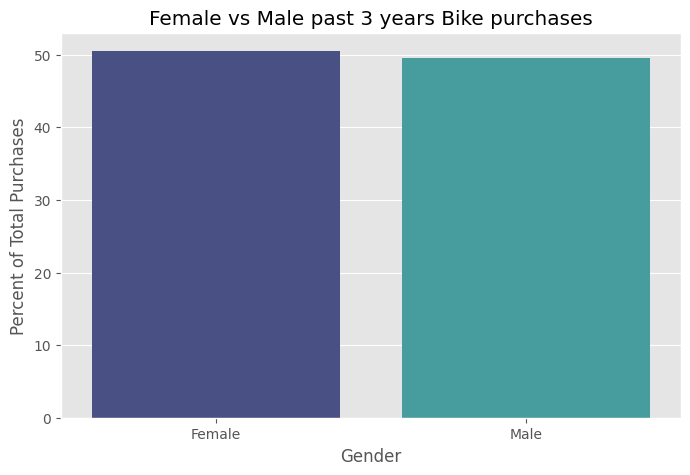

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='gender',y='Percent_of_total',data=cust_bike_purchase_by_gender, palette="mako")
plt.xlabel('Gender')
plt.ylabel('Percent of Total Purchases')
plt.title('Female vs Male past 3 years Bike purchases')

plt.show()

3.3 Job Industry Customer Distribution

Among the New Customers the highest amount of sales comes from customers having a job in Manufacturing and Financial services sector. The samllest chunk of sales comes from customers in Agriculture sector and from Telecom sector with 3% sales only. Similar trend is observed among Old Customers.

In [ ]:
new_cust['job_industry_category'].unique()

array(['Manufacturing', 'Property', 'Financial Services', 'Entertainment',
       'Retail', 'IT', 'Telecommunications', 'Health', 'Missing',
       'Argiculture'], dtype=object)

/tmp/ipython-input-1055379760.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='job_industry_category',data=new_cust[~(new_cust['job_industry_category']=='Missing')], palette= "mako")


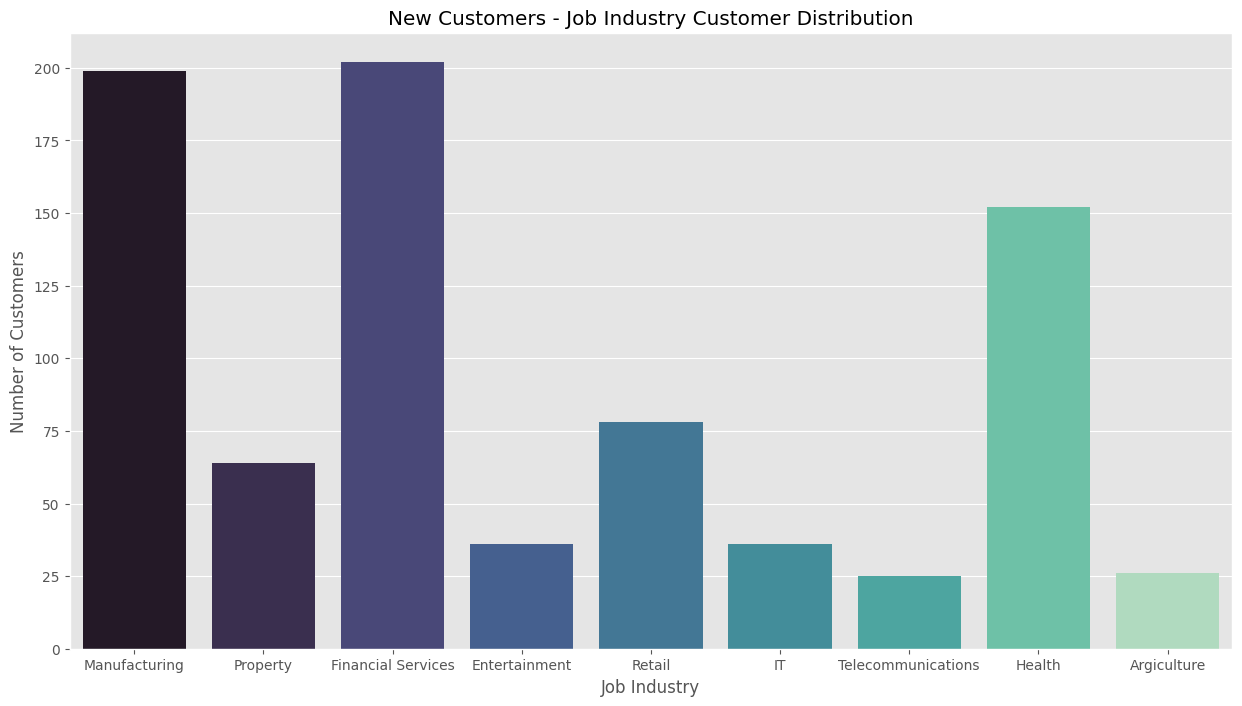

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='job_industry_category',data=new_cust[~(new_cust['job_industry_category']=='Missing')], palette= "mako")
plt.xlabel('Job Industry')
plt.ylabel('Number of Customers')
plt.title('New Customers - Job Industry Customer Distribution')

plt.show()

/tmp/ipython-input-2782307192.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='job_industry_category',data=cust_trans_rfm[~(cust_trans_rfm['job_industry_category']=='Missing')], palette= "mako")


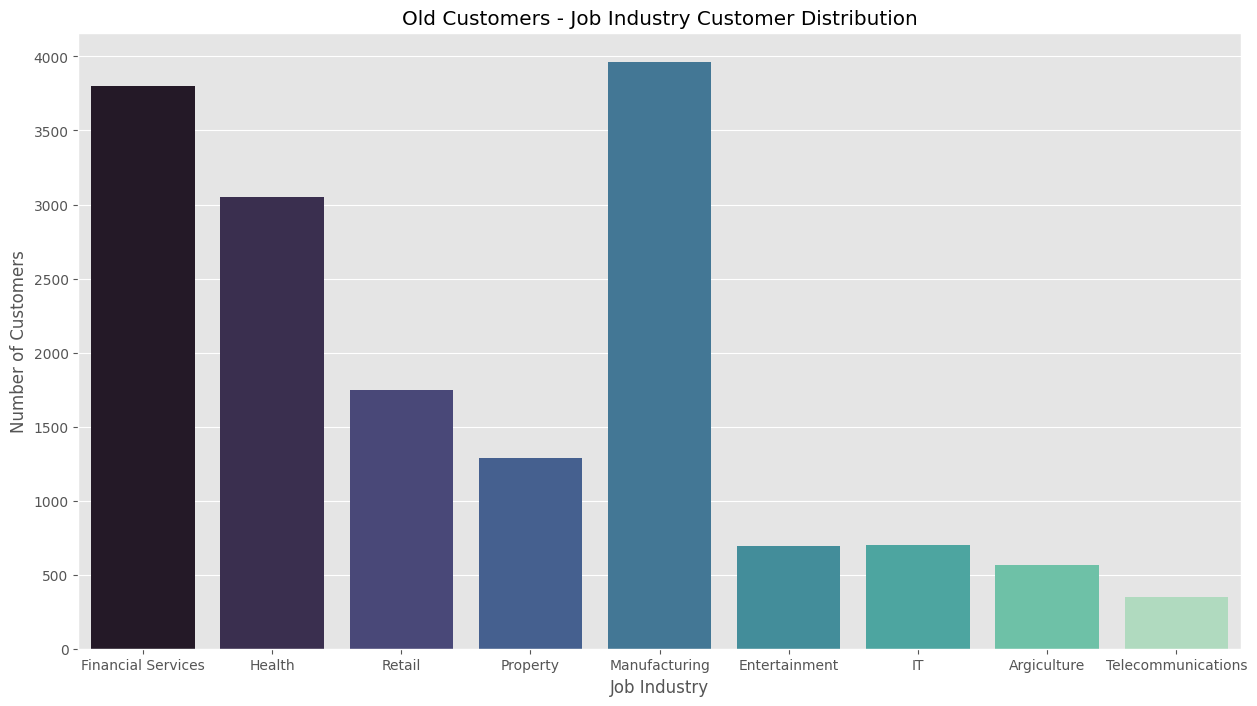

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='job_industry_category',data=cust_trans_rfm[~(cust_trans_rfm['job_industry_category']=='Missing')], palette= "mako")
plt.xlabel('Job Industry')
plt.ylabel('Number of Customers')
plt.title('Old Customers - Job Industry Customer Distribution')

plt.show()

3.4. Wealth Segmentation by Age Group

Across all Age Groups the maximum number of customers are classified as 'Mass Customers'. The next being 'High Net Worth'. However among 40-49 aged customers 'Affluent Customers' outperforms the 'High Net Worth' customers.

New Customers

In [ ]:
wealth_age_seg_new = new_cust.groupby(['wealth_segment', 'Age Group']).size().reset_index()

In [ ]:
wealth_age_seg_new.rename(columns={0:'Number of Customers'}, inplace=True)
wealth_age_seg_new

,wealth_segment,Age Group,Number of Customers
0,Affluent Customer,20,3
1,Affluent Customer,30,49
2,Affluent Customer,40,15
3,Affluent Customer,50,58
4,Affluent Customer,60,40
5,Affluent Customer,70,41
6,Affluent Customer,80,20
7,Affluent Customer,90,9
8,High Net Worth,30,42
9,High Net Worth,40,34


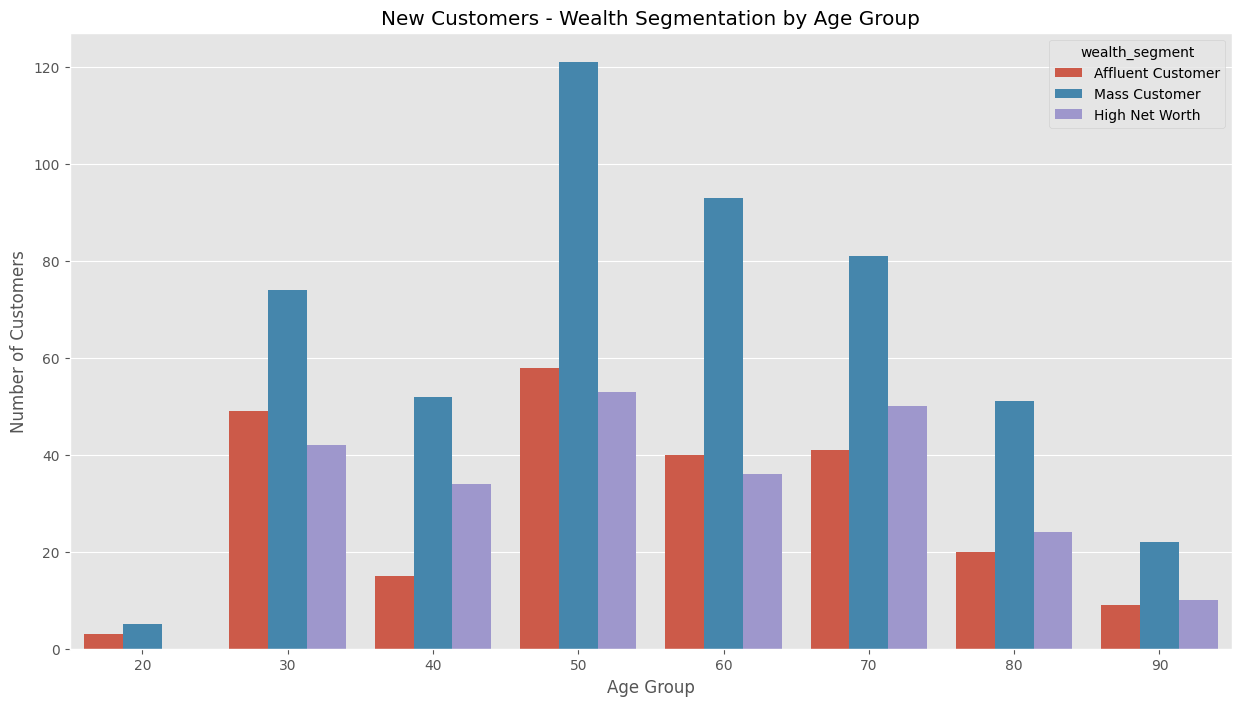

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x='Age Group', y='Number of Customers' , hue='wealth_segment', data=wealth_age_seg_new)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('New Customers - Wealth Segmentation by Age Group')
plt.show()

In all the age groups the most number of customers are 'Mass Customers'. The 2nd largest customer base being the 'High Net Worth' group.
In the age group 40-49 the 'Affluent Customer' group outperforms 'High Net Worth' group

Old Customers

Similar treand (like that of New Customers) is observed among Old Customers

In [ ]:
wealth_age_seg_old = cust_trans_rfm.groupby(['wealth_segment', 'Age_Group']).size().reset_index()

In [ ]:
wealth_age_seg_old.rename(columns={0:'Number of Customers'}, inplace=True)

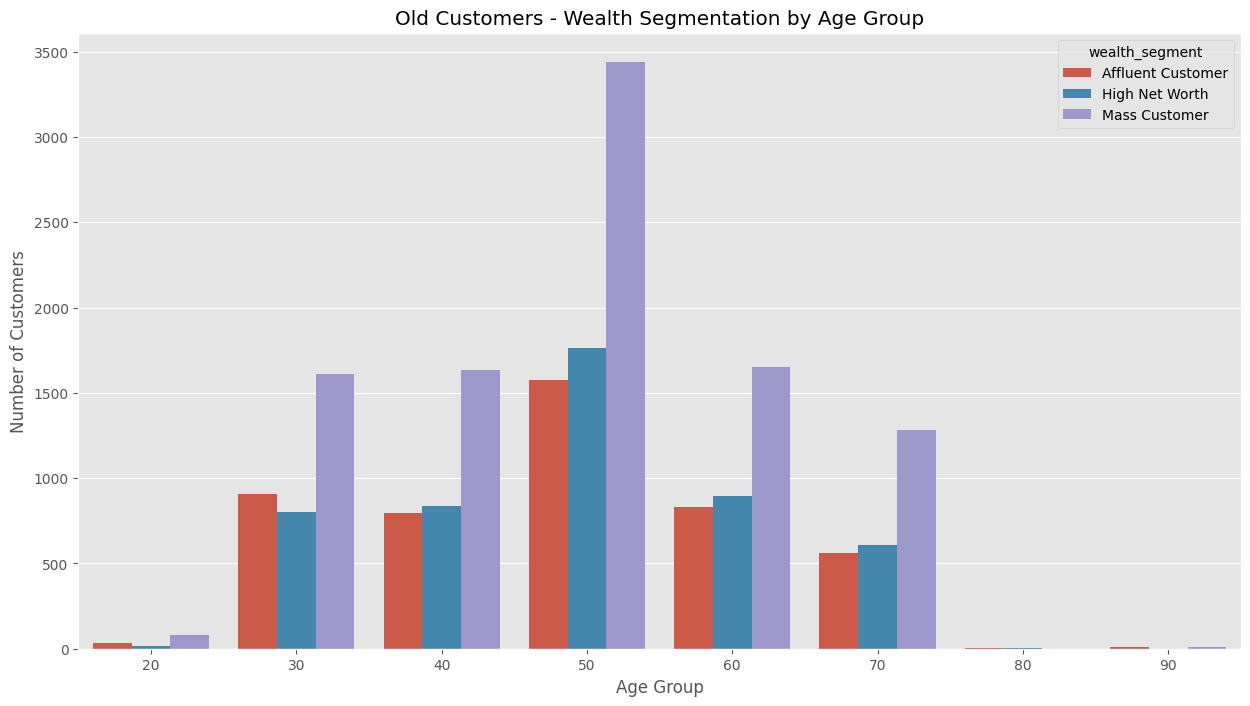

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x='Age_Group', y='Number of Customers' , hue='wealth_segment', data=wealth_age_seg_old)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Old Customers - Wealth Segmentation by Age Group')
plt.show()

3.5. Car owner across each State

The customer base of the automobile bike company lies in New South Wales, Queensland and Victoria, Australia.
In New South Wales (NSW) it seems there is a greater amount of people who donot own a car. In Victoria (VIC) the proportion is evenly split. However in Queensland (QLD) there are relatively more people who own the car.

In [ ]:
# Loading the Customer Address Dataset.

cust_addr_info = pd.read_csv('CustomerAddress_Cleaned.csv')

In [ ]:
cust_addr_info.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [ ]:
# Merging the RFM data with Customer Address dataset.

cust_trans_addr = pd.merge(cust_trans_rfm , cust_addr_info, left_on = 'customer_id' ,
                           right_on = 'customer_id', how='inner')

In [ ]:
print("RFM table Records count : {}\nAddress Table Records count :{}".format(cust_trans_rfm.shape ,cust_addr_info.shape))

RFM table Records count : (19354, 37)
Address Table Records count :(3999, 6)


In [ ]:
state_car_owners = cust_trans_addr[['state' , 'owns_car' , 'customer_id']].drop_duplicates().groupby(['state', 'owns_car']).size().reset_index()

In [ ]:
state_car_owners.rename(columns={0:'Number of Customers'}, inplace=True)
state_car_owners

,state,owns_car,Number of Customers
0,NSW,No,889
1,NSW,Yes,935
2,QLD,No,365
3,QLD,Yes,363
4,VIC,No,435
5,VIC,Yes,425


In [ ]:
state_car_owners['state'].unique()

array(['NSW', 'QLD', 'VIC'], dtype=object)

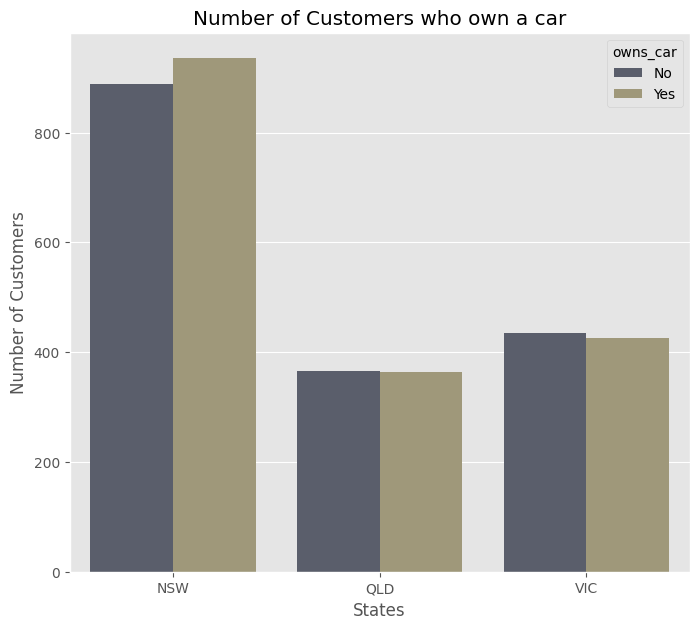

In [ ]:
plt.figure(figsize=(8,7))
sns.barplot(x='state', y='Number of Customers' , hue='owns_car', data=state_car_owners, palette= 'cividis')
plt.xlabel('States')
plt.ylabel('Number of Customers')
plt.title('Number of Customers who own a car')
plt.show()

NSW has the largest number of people that donot own a car. It seems that a higher amount of data is collected from NSW compared to other states. In QLD the distribution between customers having a car or not having is even. In Victoria the number is split evenly. Both the numbers are significantly lower than that of NSW

# 4. RFM Analysis Scatter Plots

4.1. Recency vs Monetary
The chart shows that customers who purchased recently generated more revenue than customers who visited long time ago. Customers from recent past (50-100) days generated a moderate revenue. Customers who visited 200 days ago generated a low revenue.

<Figure size 800x700 with 0 Axes>

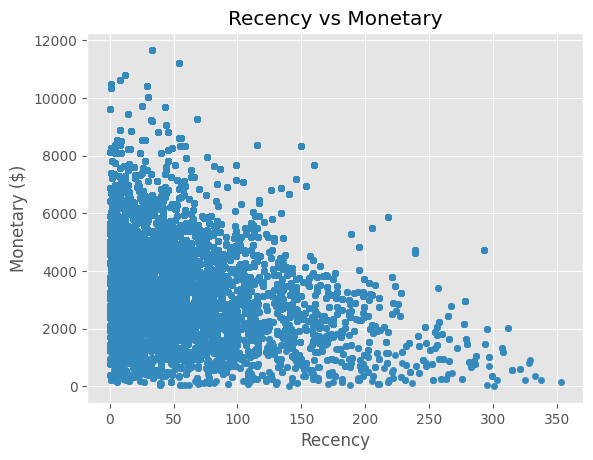

In [ ]:
plt.figure(figsize=(8,7))
cust_trans_rfm.plot.scatter(x='recency' , y='monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary ($)')
plt.title('Recency vs Monetary')
plt.show()

4.2 Frequency vs Monetary

Customers classified as "Platinum Custoers" , "Very Loyal" and "Becoming Loyal" visit frequently, which correlated with increased revenue for the business.

<Figure size 800x700 with 0 Axes>

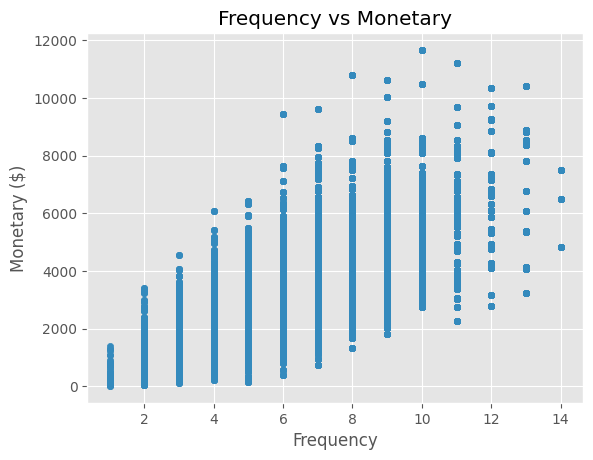

In [ ]:
plt.figure(figsize=(8,7))
cust_trans_rfm.plot.scatter(x='frequency' , y='monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary ($)')
plt.title('Frequency vs Monetary')
plt.show()

# 5. Customer Segment Distribution

Finally we can plot the Number of Customers present under a Customer Segment.

In [ ]:
# Calculating the number of unique customers under a customer title.

cust_per_title = cust_trans_rfm[['detail_cust_title', 'customer_id','rank']].drop_duplicates().groupby(
    ['detail_cust_title','rank']).size().reset_index().sort_values('rank')

In [ ]:
cust_per_title.rename(columns={0:'Number of Customers'}, inplace=True)
cust_per_title

,detail_cust_title,rank,Number of Customers
7,Platinum Customer,1,164
10,Very Loyal,2,181
1,Becoming Loyal,3,344
9,Recent Customer,4,357
8,Potential Customer,5,340
4,Late Bloomer,6,332
5,Loosing Customer,7,333
3,High Risk Customer,8,371
0,Almost Lost Customer,9,315
2,Evasive Customer,10,388


/tmp/ipython-input-4142439049.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='detail_cust_title' , x='Number of Customers', data=cust_per_title, palette= 'plasma')


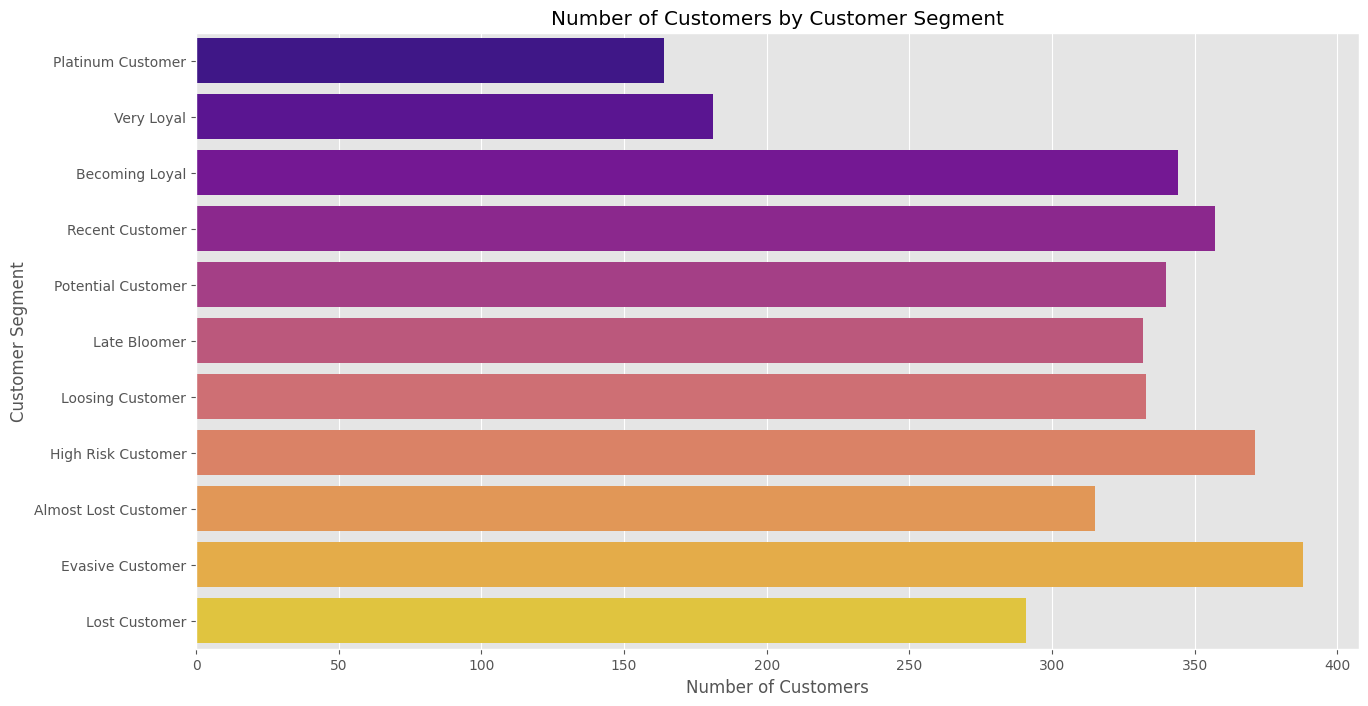

In [ ]:
# Plotting the Number of Customers

plt.figure(figsize=(15,8))
sns.barplot(y='detail_cust_title' , x='Number of Customers', data=cust_per_title, palette= 'plasma')
plt.xlabel('Number of Customers')
plt.ylabel('Customer Segment')
plt.title('Number of Customers by Customer Segment')
plt.show()